# Image Compression Using Singular Value Decomposition

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
image = np.array(Image.open('image.jpg'))

In [4]:
img_row = image.shape[0]
img_col = image.shape[1]
img_channels = image.shape[2]
print(image.shape)
print('Max and Min pixel value:', np.max(image),' , ', np.min(image))
image_size = image.size
print('image size = ', image_size)

(500, 750, 3)
Max and Min pixel value: 255  ,  0
image size =  1125000


In [5]:
image = image / 255
print('Max and Min pixel value:', np.max(image),' , ', np.min(image))

Max and Min pixel value: 1.0  ,  0.0


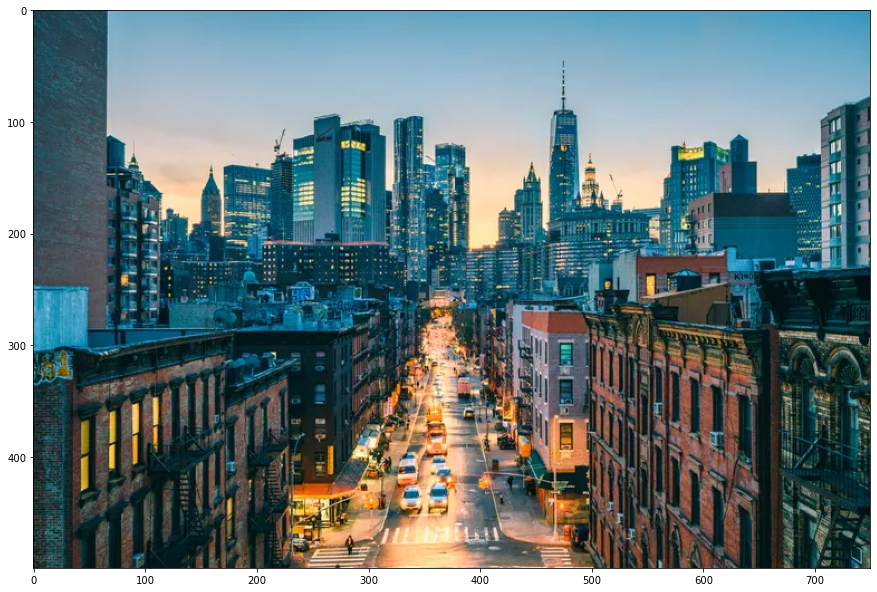

In [6]:
# Show the original image
plt.figure(figsize=(15,15))
plt.imshow(image)

In [7]:
# Get the 3 channels
image_r = image[:,:,0]
image_g = image[:,:,1]
image_b = image[:,:,2]

image_r.shape

(500, 750)

### Perform SVD

In [8]:
# Take the SVD of each of the channels
# [U S V'] = svd(matrix)
[u_red, s_red, v_red] = np.linalg.svd(image_r)
[u_green, s_green, v_green] = np.linalg.svd(image_g)
[u_blue, s_blue, v_blue] = np.linalg.svd(image_b)

print(u_red.shape, s_red.shape, v_red.shape)
print('Number of singular values = ', s_red.size)

svd_image_size = u_red.size + s_red.size + v_red.size + u_green.size + s_green.size + v_green.size + u_blue.size + s_blue.size + v_blue.size

(500, 500) (500,) (750, 750)
Number of singular values =  500


### Get rid of some of the singular values

In [9]:
# Number of singular values to keep
k = 100

In [10]:
# Truncate the U S V matrix
u_red_truncated = u_red[:,0:k]
u_green_truncated = u_green[:,0:k]
u_blue_truncated = u_blue[:,0:k]

s_red_truncated = np.diag(s_red[0:k])
s_green_truncated = np.diag(s_green[0:k])
s_blue_truncated = np.diag(s_blue[0:k])

v_red_truncated = v_red[0:k,:]
v_green_truncated = v_green[0:k,:]
v_blue_truncated = v_blue[0:k,:]

print(u_red_truncated.shape, s_red_truncated.shape, v_red_truncated.shape)

low_rank_image_size = u_red_truncated.size + s_red_truncated.shape[0] + v_red_truncated.size + u_green_truncated.size + s_green_truncated.shape[0] + v_green_truncated.size + u_blue_truncated.size + s_blue_truncated.shape[0] + v_blue_truncated.size
print('low_rank_image_size = ', low_rank_image_size)
print('svd_image_size = ', svd_image_size)
print('image_size = ', image_size)

print('Size difference = ', image_size - low_rank_image_size)
print('% Compression = ',100 - (100 * low_rank_image_size / image_size) )


(500, 100) (100, 100) (100, 750)
low_rank_image_size =  375300
svd_image_size =  2439000
image_size =  1125000
Size difference =  749700
% Compression =  66.64


### Reconstruct the compressed image

In [11]:
# Image = U*S*V'
low_rank_image_red = np.dot(np.dot(u_red_truncated, s_red_truncated),  v_red_truncated)
low_rank_image_green = np.dot(np.dot(u_green_truncated, s_green_truncated),  v_green_truncated)
low_rank_image_blue = np.dot(np.dot(u_blue_truncated, s_blue_truncated),  v_blue_truncated)

print('Output image size = ',low_rank_image_red.shape)


Output image size =  (500, 750)


In [12]:
low_rank_image = np.zeros(shape=(img_row,img_col,img_channels))
low_rank_image[:,:,0] = low_rank_image_red;
low_rank_image[:,:,1] = low_rank_image_green;
low_rank_image[:,:,2] = low_rank_image_blue;

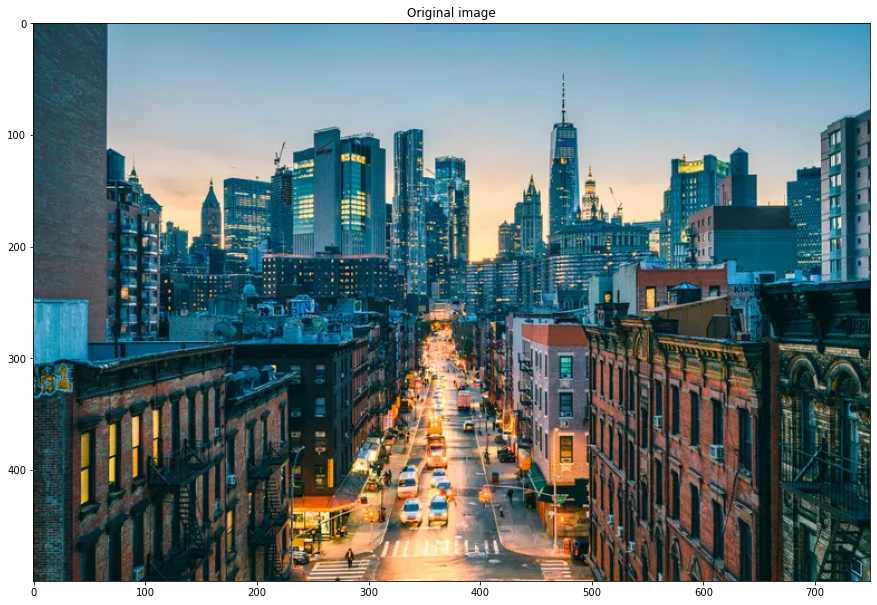

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


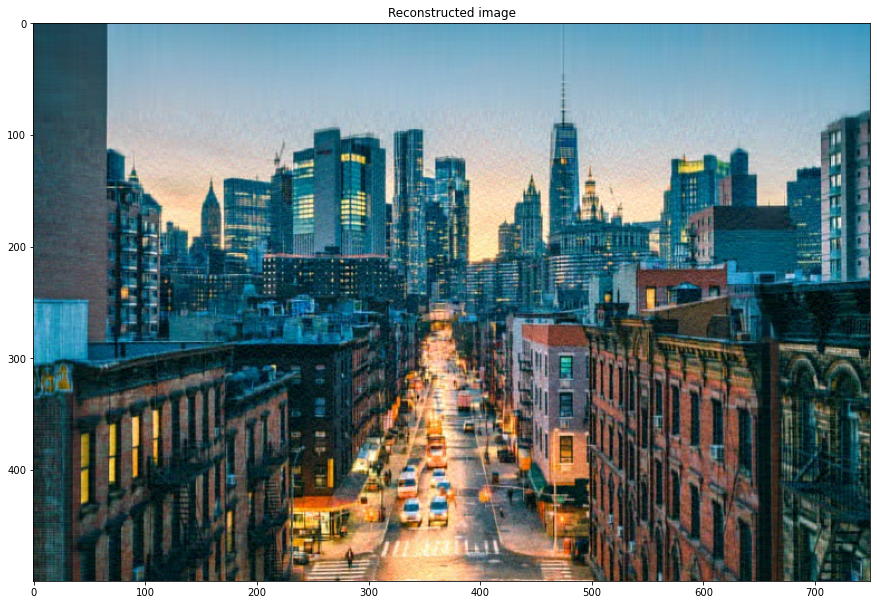

In [15]:
# Display images
plt.figure(figsize=(15,15))
plt.imshow(image)
plt.title('Original image')
plt.show()

plt.figure(figsize=(15,15))
plt.imshow(low_rank_image)
plt.title('Reconstructed image')
plt.show()
